In [2]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tqdm.notebook import tqdm
from sklearn.model_selection import KFold
from hmmlearn.hmm import CategoricalHMM, GaussianHMM
from scipy.stats import norm
from scipy import signal

In [10]:
def countmax_min(dataset):
    length_list=[len(trial) for trial in dataset]
    return max(length_list),min(length_list)

In [15]:
dec_factor=20
num_states = 20

In [12]:
Carl_chronic_df=pd.read_pickle("../data/CBP_rating.pkl")
Carl_subacute_df=pd.read_pickle("../data/SBP_rating.pkl")
Carl_classify=pd.read_pickle("../data/class.pkl")
cbp_D1=[]
cbp_D4=[]
sbpr_D1=[]
sbpr_D4=[]
sbpp_D1=[]
sbpp_D4=[]
class_pain={}
for index,row in Carl_classify.iterrows():
    if row['subject'] not in class_pain:
        class_pain[row['subject']]=row['classification']
PID_list=[]
for index,row in Carl_chronic_df.iterrows():
    if row['PID'] not in PID_list:
        PID_list.append(row['PID'])
    else:
        continue
    if row['D1_rating']!=[]:
        cbp_D1.append(row['D1_rating'])
    if row['D4_rating']!=[]:
        cbp_D4.append(row['D4_rating'])
for index,row in Carl_subacute_df.iterrows():
    if row['PID'] not in PID_list:
        PID_list.append(row['PID'])
    else:
        continue
    if class_pain[row['PID']]=='SBPr':
        if row['D1_rating']!=[]:
            sbpr_D1.append(row['D1_rating'])
        if row['D4_rating']!=[]:
            sbpr_D4.append(row['D4_rating'])
    elif class_pain[row['PID']]=='SBPp':
        if row['D1_rating']!=[]:
            sbpp_D1.append(row['D1_rating'])
        if row['D4_rating']!=[]:
            sbpp_D4.append(row['D4_rating'])
    else:
        print(row['PID']+"error")
max_cbp1,min_cbp1=countmax_min(cbp_D1)
max_cbp4,min_cbp4=countmax_min(cbp_D4)
max_sbpr1,min_sbpr1=countmax_min(sbpr_D1)
max_sbpr4,min_sbpr4=countmax_min(sbpr_D4)
max_sbpp1,min_sbpp1=countmax_min(sbpp_D1)
max_sbpp4,min_sbpp4=countmax_min(sbpp_D4)
print("CBP Day1: "+str(len(cbp_D1)))
print("CBP Day4: "+str(len(cbp_D4)))
print("SBPr Day1: "+str(len(sbpr_D1)))
print("SBPr Day4: "+str(len(sbpr_D4)))
print("SBPp Day1: "+str(len(sbpp_D1)))
print("SBPp Day4: "+str(len(sbpp_D4)))

CBP Day1: 24
CBP Day4: 21
SBPr Day1: 25
SBPr Day4: 24
SBPp Day1: 42
SBPp Day4: 41


In [16]:
CBP1_conc=[item for trial in cbp_D1 for item in trial]
CBP4_conc=[item for trial in cbp_D4 for item in trial]
SBPr1_conc=[item for trial in sbpr_D1 for item in trial]
SBPr4_conc=[item for trial in sbpr_D4 for item in trial]
SBPp1_conc=[item for trial in sbpp_D1 for item in trial]
SBPp4_conc=[item for trial in sbpp_D4 for item in trial]

CBP1_conc_dec=signal.decimate(CBP1_conc, dec_factor)
CBP4_conc_dec=signal.decimate(CBP4_conc, dec_factor)
SBPr1_conc_dec=signal.decimate(SBPr1_conc, dec_factor)
SBPr4_conc_dec=signal.decimate(SBPr4_conc, dec_factor)
SBPp1_conc_dec=signal.decimate(SBPp1_conc, dec_factor)
SBPp4_conc_dec=signal.decimate(SBPp4_conc, dec_factor)

### CBP Day1

In [17]:
# Reshape the observed data to a 2D array (required by hmmlearn)
observed_data_CBP_D1 = CBP1_conc_dec.reshape(-1, 1)
# Create and train the Gaussian HMM model
# num_states = 10
model_CBP_D1 = GaussianHMM(n_components=num_states, n_iter=1000)
model_CBP_D1.fit(observed_data_CBP_D1)

GaussianHMM(n_components=20, n_iter=1000)

In [18]:
model_CBP_D1_df=pd.DataFrame({
    "model":[model_CBP_D1]
})
filename="GHMM_s"+str(num_states)+"_dec"+str(dec_factor)+'_CBP_D1'+'.pkl'
model_CBP_D1_df.to_pickle("../data/model_dataset/"+filename)

In [19]:
# observed_data = Carl_rating_AllinOne.reshape(-1, 1)
log_likelihood = model_CBP_D1.score(observed_data_CBP_D1)
print("log likelihood:", log_likelihood)

# Get the log-likelihood of the data given the model
log_likelihood = model_CBP_D1.score(observed_data_CBP_D1)

# Get the number of parameters in the model
num_params = model_CBP_D1.n_features * model_CBP_D1.n_components + (model_CBP_D1.n_components - 1) * model_CBP_D1.n_components

# Calculate the Akaike Information Criterion (AIC)
aic = -2 * log_likelihood + 2 * num_params

# Calculate the Bayesian Information Criterion (BIC)
bic = -2 * log_likelihood + num_params * np.log(len(observed_data_CBP_D1))

# Display the AIC and BIC
print("Akaike Information Criterion (AIC):", aic)
print("Bayesian Information Criterion (BIC):", bic)

log likelihood: -24226.279251766973
Akaike Information Criterion (AIC): 49252.558503533946
Bayesian Information Criterion (BIC): 52157.769581236025


In [20]:
# Reshape the observed data to a 2D array (required by hmmlearn)
observed_data_CBP_D4 = CBP4_conc_dec.reshape(-1, 1)
# Create and train the Gaussian HMM model
# num_states = 10
model_CBP_D4 = GaussianHMM(n_components=num_states, n_iter=1000)
model_CBP_D4.fit(observed_data_CBP_D4)
model_CBP_D4_df=pd.DataFrame({
    "model":[model_CBP_D4]
})
filename="GHMM_s"+str(num_states)+"_dec"+str(dec_factor)+'_CBP_D4'+'.pkl'
model_CBP_D4_df.to_pickle("../data/model_dataset/"+filename)
# observed_data = Carl_rating_AllinOne.reshape(-1, 1)
log_likelihood = model_CBP_D4.score(observed_data_CBP_D4)
print("log likelihood:", log_likelihood)

# Get the number of parameters in the model
num_params = model_CBP_D4.n_features * model_CBP_D4.n_components + (model_CBP_D4.n_components - 1) * model_CBP_D4.n_components

# Calculate the Akaike Information Criterion (AIC)
aic = -2 * log_likelihood + 2 * num_params

# Calculate the Bayesian Information Criterion (BIC)
bic = -2 * log_likelihood + num_params * np.log(len(observed_data_CBP_D4))

# Display the AIC and BIC
print("Akaike Information Criterion (AIC):", aic)
print("Bayesian Information Criterion (BIC):", bic)

log likelihood: -22063.052483684725
Akaike Information Criterion (AIC): 44926.10496736945
Bayesian Information Criterion (BIC): 47777.93059214901


In [21]:
# Reshape the observed data to a 2D array (required by hmmlearn)
observed_data_SBPr_D1 = SBPr1_conc_dec.reshape(-1, 1)
# Create and train the Gaussian HMM model
# num_states = 10
model_SBPr_D1 = GaussianHMM(n_components=num_states, n_iter=1000)
model_SBPr_D1.fit(observed_data_SBPr_D1)
model_SBPr_D1_df=pd.DataFrame({
    "model":[model_SBPr_D1]
})
filename="GHMM_s"+str(num_states)+"_dec"+str(dec_factor)+'_SBPr_D1'+'.pkl'
model_SBPr_D1_df.to_pickle("../data/model_dataset/"+filename)
# observed_data = Carl_rating_AllinOne.reshape(-1, 1)
log_likelihood = model_SBPr_D1.score(observed_data_SBPr_D1)
print("log likelihood:", log_likelihood)

# Get the number of parameters in the model
num_params = model_SBPr_D1.n_features * model_SBPr_D1.n_components + (model_SBPr_D1.n_components - 1) * model_SBPr_D1.n_components

# Calculate the Akaike Information Criterion (AIC)
aic = -2 * log_likelihood + 2 * num_params

# Calculate the Bayesian Information Criterion (BIC)
bic = -2 * log_likelihood + num_params * np.log(len(observed_data_SBPr_D1))

# Display the AIC and BIC
print("Akaike Information Criterion (AIC):", aic)
print("Bayesian Information Criterion (BIC):", bic)

log likelihood: -25727.015409248517
Akaike Information Criterion (AIC): 52254.030818497034
Bayesian Information Criterion (BIC): 55175.56310452244


In [22]:
# Reshape the observed data to a 2D array (required by hmmlearn)
observed_data_SBPr_D4 = SBPr4_conc_dec.reshape(-1, 1)
# Create and train the Gaussian HMM model
# num_states = 10
model_SBPr_D4 = GaussianHMM(n_components=num_states, n_iter=1000)
model_SBPr_D4.fit(observed_data_SBPr_D4)
model_SBPr_D4_df=pd.DataFrame({
    "model":[model_SBPr_D4]
})
filename="GHMM_s"+str(num_states)+"_dec"+str(dec_factor)+'_SBPr_D4'+'.pkl'
model_SBPr_D4_df.to_pickle("../data/model_dataset/"+filename)
# observed_data = Carl_rating_AllinOne.reshape(-1, 1)
log_likelihood = model_SBPr_D4.score(observed_data_SBPr_D4)
print("log likelihood:", log_likelihood)

# Get the number of parameters in the model
num_params = model_SBPr_D4.n_features * model_SBPr_D4.n_components + (model_SBPr_D4.n_components - 1) * model_SBPr_D4.n_components

# Calculate the Akaike Information Criterion (AIC)
aic = -2 * log_likelihood + 2 * num_params

# Calculate the Bayesian Information Criterion (BIC)
bic = -2 * log_likelihood + num_params * np.log(len(observed_data_SBPr_D4))

# Display the AIC and BIC
print("Akaike Information Criterion (AIC):", aic)
print("Bayesian Information Criterion (BIC):", bic)

log likelihood: -11997.871882775647
Akaike Information Criterion (AIC): 24795.743765551295
Bayesian Information Criterion (BIC): 27700.95484325337


In [23]:
# Reshape the observed data to a 2D array (required by hmmlearn)
observed_data_SBPp_D1 = SBPp1_conc_dec.reshape(-1, 1)
# Create and train the Gaussian HMM model
# num_states = 10
model_SBPp_D1 = GaussianHMM(n_components=num_states, n_iter=1000)
model_SBPp_D1.fit(observed_data_SBPp_D1)
model_SBPp_D1_df=pd.DataFrame({
    "model":[model_SBPp_D1]
})
filename="GHMM_s"+str(num_states)+"_dec"+str(dec_factor)+'_SBPp_D1'+'.pkl'
model_SBPp_D1_df.to_pickle("../data/model_dataset/"+filename)
# observed_data = Carl_rating_AllinOne.reshape(-1, 1)
log_likelihood = model_SBPp_D1.score(observed_data_SBPp_D1)
print("log likelihood:", log_likelihood)

# Get the number of parameters in the model
num_params = model_SBPp_D1.n_features * model_SBPp_D1.n_components + (model_SBPp_D1.n_components - 1) * model_SBPp_D1.n_components

# Calculate the Akaike Information Criterion (AIC)
aic = -2 * log_likelihood + 2 * num_params

# Calculate the Bayesian Information Criterion (BIC)
bic = -2 * log_likelihood + num_params * np.log(len(observed_data_SBPp_D1))

# Display the AIC and BIC
print("Akaike Information Criterion (AIC):", aic)
print("Bayesian Information Criterion (BIC):", bic)

log likelihood: -44944.148008609605
Akaike Information Criterion (AIC): 90688.29601721921
Bayesian Information Criterion (BIC): 93817.35883106785


In [24]:
# Reshape the observed data to a 2D array (required by hmmlearn)
observed_data_SBPp_D4 = SBPp4_conc_dec.reshape(-1, 1)
# Create and train the Gaussian HMM model
# num_states = 10
model_SBPp_D4 = GaussianHMM(n_components=num_states, n_iter=1000)
model_SBPp_D4.fit(observed_data_SBPp_D4)
model_SBPp_D4_df=pd.DataFrame({
    "model":[model_SBPp_D4]
})
filename="GHMM_s"+str(num_states)+"_dec"+str(dec_factor)+'_SBPp_D4'+'.pkl'
model_SBPp_D4_df.to_pickle("../data/model_dataset/"+filename)
# observed_data = Carl_rating_AllinOne.reshape(-1, 1)
log_likelihood = model_SBPp_D4.score(observed_data_SBPp_D4)
print("log likelihood:", log_likelihood)

# Get the number of parameters in the model
num_params = model_SBPp_D4.n_features * model_SBPp_D4.n_components + (model_SBPp_D4.n_components - 1) * model_SBPp_D4.n_components

# Calculate the Akaike Information Criterion (AIC)
aic = -2 * log_likelihood + 2 * num_params

# Calculate the Bayesian Information Criterion (BIC)
bic = -2 * log_likelihood + num_params * np.log(len(observed_data_SBPp_D4))

# Display the AIC and BIC
print("Akaike Information Criterion (AIC):", aic)
print("Bayesian Information Criterion (BIC):", bic)

log likelihood: -42518.43451683854
Akaike Information Criterion (AIC): 85836.86903367708
Bayesian Information Criterion (BIC): 88956.2975867117


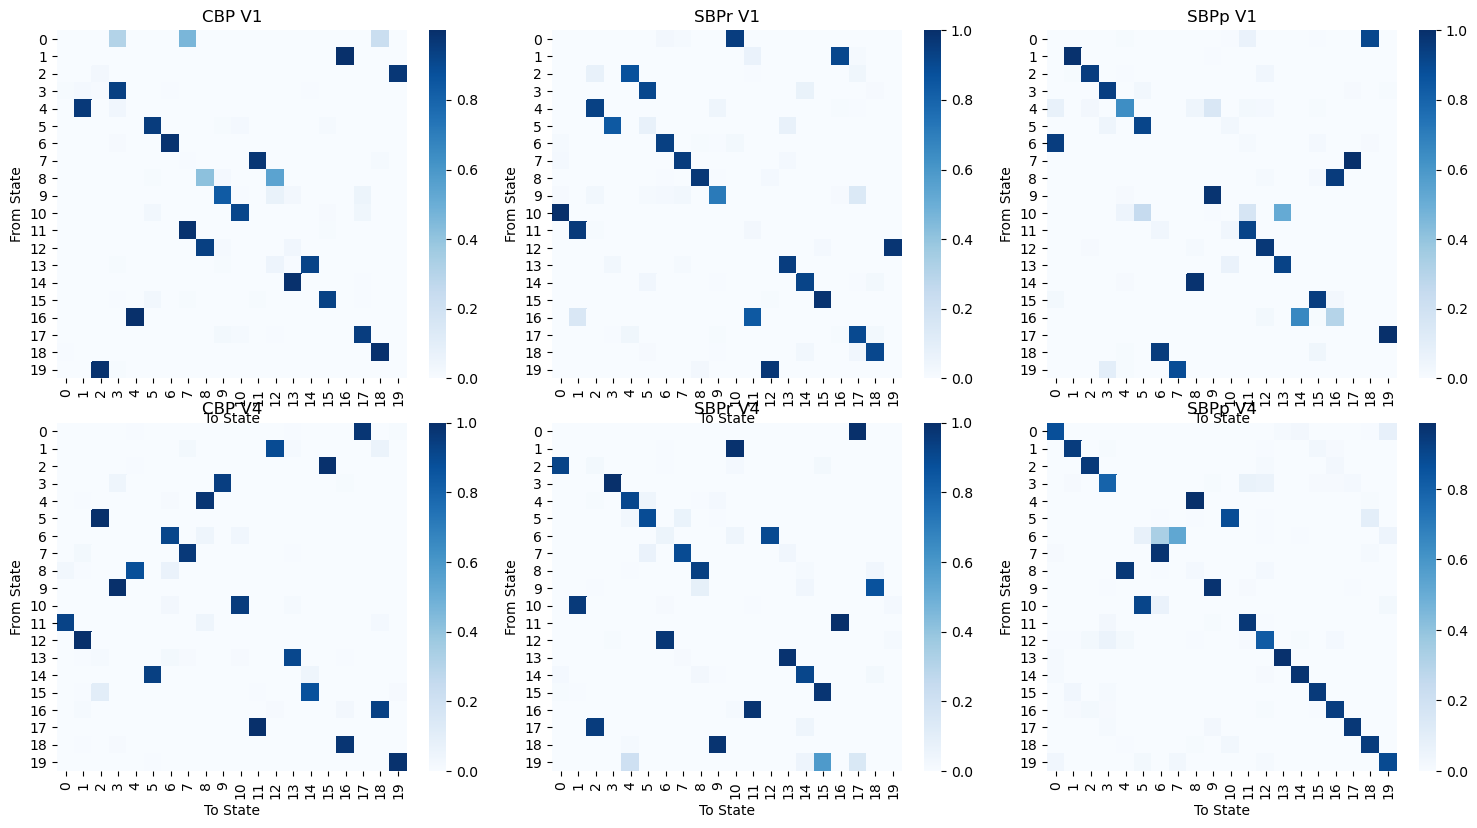

In [31]:
# State Transition Matrix
# sns.heatmap(model.transmat_, annot=True, cmap='Blues')
fig, ax = plt.subplots(2, 3,figsize=(15, 8))
fig.tight_layout()
plt.subplot(2,3,1)
sns.heatmap(model_CBP_D1.transmat_, cmap='Blues')
plt.xlabel('To State')
plt.ylabel('From State')
plt.title('CBP V1')
plt.subplot(2,3,4)
sns.heatmap(model_CBP_D4.transmat_, cmap='Blues')
plt.xlabel('To State')
plt.ylabel('From State')
plt.title('CBP V4')
plt.subplot(2,3,2)
sns.heatmap(model_SBPr_D1.transmat_, cmap='Blues')
plt.xlabel('To State')
plt.ylabel('From State')
plt.title('SBPr V1')
plt.subplot(2,3,5)
sns.heatmap(model_SBPr_D4.transmat_, cmap='Blues')
plt.xlabel('To State')
plt.ylabel('From State')
plt.title('SBPr V4')
plt.subplot(2,3,3)
sns.heatmap(model_SBPp_D1.transmat_, cmap='Blues')
plt.xlabel('To State')
plt.ylabel('From State')
plt.title('SBPp V1')
plt.subplot(2,3,6)
sns.heatmap(model_SBPp_D4.transmat_, cmap='Blues')
plt.xlabel('To State')
plt.ylabel('From State')
plt.title('SBPp V4')
# plt.title('State Transition Matrix')
plt.show()